In [1]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

#### Нейройсеть
<img src="./xor_problem.png" />
1 скрытый слой с 2 нейронами

$w_{12}$ - вес 1 нейрона у 2 нейрона следующего слоя

$x_{1}$ - значение нейрона

$n_{1}$ - вход 1 нейрона в слое ($\sum_{i} w_{ji}x_{i} $)


Матрица весов первого слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix}$

Вычисление входа второго слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} \begin{pmatrix} x_{1}\\ x_{2}\end{pmatrix} + \begin{pmatrix} b_{1}\\ b_{2}\end{pmatrix} = \begin{pmatrix} n_{1}\\ n_{2} \end{pmatrix} $

Значения второго слоя: $ \begin{pmatrix} f(n_{1}) \\ f(n_{2}) \end{pmatrix} = \begin{pmatrix} x_{12} \\ x_{22} \end{pmatrix} $

Матрица весов второго слоя: $\begin{pmatrix} w_{11} & w_{12} \end{pmatrix}$

Вычисление входа третьего слоя: $\begin{pmatrix} w_{11} w_{12} \end{pmatrix} \begin{pmatrix} x_{12} \\ x_{22} \end{pmatrix} + \begin{pmatrix} b_{3}\end{pmatrix} = \begin{pmatrix} n_{1}^3\end{pmatrix} $

Значение 3 слоя: $f(n_{13}) = x_{13}$

Ошибка сети: $ (y_{target} - x_{13}) * f'(n_{13}) = \delta_1^3$

ошибки 2 слоя: $ \begin{pmatrix} w_{11}^2 w_{12}^2 \end{pmatrix}^T * \delta_1^3  \circ \begin{pmatrix} f'(n_{1}) \\  f'(n_{2}) \end{pmatrix}) = \begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix} $

"Ошибки" 1 слоя (в алгоритме не нужны): $ \begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix}^T \begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix} \circ f'(\begin{pmatrix} n_{01} & n_{02} \end{pmatrix}) = 
\begin{pmatrix} w_{11} & w_{21}\\ w_{12} & w_{22} \end{pmatrix} \begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix} \circ f'(\begin{pmatrix} n_{01} & n_{02} \end{pmatrix})$

Изменение весов 2 слоя:  $ \delta_1^3 * \begin{pmatrix} x_{12} \\ x_{22} \end{pmatrix} = \begin{pmatrix} \Delta_{11} \\ \Delta_{12} \end{pmatrix} $

Извенения базиса 2 слоя: $ \delta_1^3  = \Delta_b $

Изменение весов 1 слоя:  $\begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix} \begin{pmatrix} x_{11} \\ x_{12} \end{pmatrix}^T =
\begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix} \begin{pmatrix} x_{11} & x_{12} \end{pmatrix} = \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix}$

Извенения базисов 1 слоя: $ \begin{pmatrix} \delta_1^2 \\ \delta_2^2 \end{pmatrix}  = \begin{pmatrix} \Delta_{b1} \\ \Delta_{b2} \end{pmatrix} $

Итоговое значение весов первого слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \alpha * \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix} $, где $\alpha$ - скорость градиентного спуска

In [108]:
class Layer:
    def __init__(self, layer_size, prew_layer_size):
        self.layer_size = layer_size
        self.next_layer_size = next_layer_size
        weight = []
        for i in layer_size:
            line = []
            for j in next_layer_size:
                line.append(random.rand_range(-1, 1))
            weight.append(line)
        self.weight = weight
        
    def forward(prev_layer):
        neuron

In [36]:

def xor(x, y):
    return 1 if x+y != 1 else 0

x_train = []
y_train = []
for _ in range(2048):
    x = randint(0, 1)
    y = randint(0, 1)
    x_train.append([x , y])
    y_train.append(xor(x, y))
#     print ([x , y], '~>', xor(x, y))

x_train = np.array(x_train)
y_train = np.array(y_train)

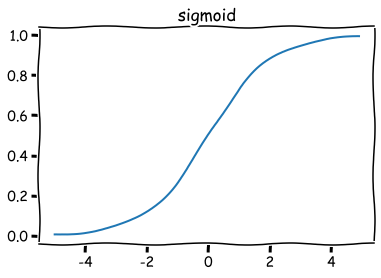

In [48]:
def sigmoid(x):
    return 1.0/ (1 + np.exp(-x))

def derivative_sigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

with plt.xkcd():
    x = np.array(list(range(-50, 50))) / 10.0
    plt.plot(x, sigmoid(x))
    plt.title("sigmoid")
    plt.show()

In [29]:
W1 = np.random.uniform(low=0, high=1, size=(2,2))
B1 = np.random.uniform(low=0, high=1, size=(2,1))
W2 = np.random.uniform(low=0, high=1, size=(1,2))
B2 = np.random.uniform(low=0, high=1, size=(1,1))


In [6]:
np.reshape(x_train[1], (2, 1))


array([[0],
       [1]])

In [7]:
print(x_train[0])
print(W1)
print(W1.dot(x_train[1]))
print(W1.dot(np.reshape(x_train[1], (2, 1))))

[0 0]
[[0.20438813 0.68587383]
 [0.20232326 0.29871188]]
[0.68587383 0.29871188]
[[0.68587383]
 [0.29871188]]


In [37]:
layer_in = np.reshape(x_train[1], (2, 1))

#layer 1
layer_n = W1.dot(layer_in) + B1
layer_result = sigmoid(layer_n)

#layer 2
layer_n = W2.dot(layer_result) + B2
layer_result = sigmoid(layer_n)
print(layer_result)


[[0.67761109]]


In [10]:

for x_i, y_i in zip(x_train, y_train):
    print(x_i, '~~>', '%.2f' % forward(np.reshape(x_i, (2,1))), '[%d]' % y_i)

[0 0] ~~> 0.84 [1]
[0 1] ~~> 0.85 [0]
[1 0] ~~> 0.84 [0]
[1 1] ~~> 0.85 [1]


In [74]:
# if True:
#     layer_in = np.reshape(x_i, (2,1))
def forward(layer_in):
    #layer 1
    layer_1 = W1.dot(layer_in) + B1
    layer_1_result = sigmoid(layer_1)

    #layer 2
    layer_2 = W2.dot(layer_1_result) + B2
    layer_2_result = sigmoid(layer_2)
    return layer_result
# print(layer_2_result)

In [38]:
loss = 0
for x_i, y_i in zip(x_train, y_train):
    loss += (forward(np.reshape(x_i, (2,1))) - y_i) ** 2
print("loss: %.2f" % float(loss))

loss: 578.21


In [61]:
res = forward(np.reshape(x_train[0], (2,1)))
loss = (res - y_train[0])
# print(loss)
errors_2 = loss * W2 * derivative_sigmoid(layer_2.T)
print(errors_2)
errors_1 = W1.dot(errors_2.T)

print(errors_1)


[[-0.05673048 -0.00372318]]
[[-0.0295182 ]
 [-0.00493915]]


In [107]:
def backward(x0, y_in):
    #layer 1
    layer_1 = W1.dot(x0) + B1
    layer_1_result = sigmoid(layer_1)

    #layer 2
    layer_2 = W2.dot(layer_1_result) + B2
    layer_2_result = sigmoid(layer_2)
    print(layer_2_result)
    
    loss = (layer_2_result - y_in)
    errors_2 = loss * derivative_sigmoid(layer_2.T)
    print(errors_2)
    errors_1 = W2.dot(errors_2)
    d1w_in = errors_1.dot(x0.T)
    d1b_in = errors_1#.dot(np.ones(1,2))
    d2w_in = errors_2.dot(layer_1_result)
    d2b_in = errors_2#.dot(np.ones(2,1))
    return d1w_in, d1b_in, d2w_in, d2b_in

res = backward(np.reshape(x_train[0], (2,1)), y_train[0])
    

[[0.69391178]]
[[-0.06501259]]


ValueError: shapes (1,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

In [72]:
loss_history = []
hist_W1 = []
hist_B1 = []
hist_W2 = []
hist_B2 = []

SyntaxError: invalid syntax (<ipython-input-72-b33ae1abf350>, line 1)

In [102]:
epochs = 30000
batch_size = 64
lr = .02

for e in range(epochs):
    i=0
    batch_loss = []
    while(i<x_train.shape[0]):
        x_batch = np.reshape(x_train[i], (2,1))
        y_batch = y_train[i]
        i += 1
        d1w, d1b, d2w, d2b = backward(x_batch, y_batch)
        W1 += lr * d1w
        B1 += lr * d1b
        W2 += lr * d2w
        print(d2b, B2)
        B2 += lr * d2b
        a2 = forward(x_batch)
        batch_loss.append(np.linalg.norm(a2 - y_batch))
        
    loss_history.append(np.mean(batch_loss))
    hist_W1.append(W1.flatten())
    hist_B1.append(B1.flatten())
    hist_W2.append(W2.flatten())
    hist_B2.append(B2.flatten())


[[-0.05682415 -0.00361369]] [[0.08593004]]


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,2)

In [73]:
x_train.shape[0]

2048

In [85]:
i = 7
x_train[i:i + 7]

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0]])

In [100]:
B1

array([[0.29053269],
       [0.61651514]])

In [ ]:
def simple_looped_nn_calc(n_layers, x, w, b):
  for l in range(n_layers - 1): #Формируется входной массив - перемножения весов в каждом слое# Если первый слой, то входной массив равен вектору х# Если слой не первый, вход для текущего слоя равен# выходу предыдущего
    if l == 0:
      node_in = x
    else :
      node_in = h #формирует выходной массив для узлов в слое l + 1
    h = np.zeros((w[l].shape[0], ))#проходит по строкам массива весов
    for i in range(w[l].shape[0]): #считает сумму внутри активационной функции
        f_sum = 0 #проходит по столбцам массива весов
        for j in range(w[l].shape[1]):
          f_sum += w[l][i][j] * node_in[j] #добавляет смещение
        f_sum += b[l][i]

    #использует активационную функцию для расчета
    #i - того выхода, в данном случае h1, h2, h3
    h[i] = f(f_sum)
return h
